In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv('/kaggle/input/playground-series-s3e21/sample_submission.csv')

In [8]:
train = data.copy()
train

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,...,4.950,1.730,1.800,4.800,3.150,10.665,10.465,16.645,5.750,10.37
1,1,9.10,13.533,40.900,8.770,9.265,6.015,10.070,7.150,1.107,...,20.050,9.530,7.695,4.550,6.950,2.040,5.200,5.725,2.950,2.23
2,2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,...,4.580,3.025,3.960,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,3,8.39,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,...,8.450,2.070,1.730,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,...,2.020,1.730,0.760,4.800,4.970,3.950,2.800,8.400,3.500,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,...,14.575,0.636,1.640,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,3496,8.09,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,...,4.580,1.730,1.800,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,...,20.050,1.440,1.800,4.867,4.833,4.725,4.950,8.400,6.625,4.20
3498,3498,9.52,10.000,6.630,9.545,9.265,3.290,8.980,2.310,0.300,...,20.050,9.530,7.695,10.700,5.400,4.725,3.300,6.750,6.625,5.00


In [9]:
data.describe()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,...,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,8.473834,8.216993,9.291581,9.633064,8.065733,5.671581,9.461363,6.547433,0.340525,...,8.710466,3.002243,3.242654,4.816718,4.754389,4.285660,5.968980,7.837995,3.750349,4.068639
std,1010.507298,1.885712,3.040743,6.817822,1.439039,1.463881,2.721399,1.140365,1.663266,0.284751,...,6.438648,2.918355,2.713923,2.009161,1.547491,2.093388,2.576146,3.724861,1.682421,1.894632
min,0.000000,1.300000,0.000000,0.000000,4.900000,2.300000,0.200000,0.000000,0.000000,0.020000,...,0.044000,0.011000,0.000000,0.570000,0.089000,0.850000,2.025000,2.020000,0.364000,1.600000
25%,874.750000,7.470000,7.100000,7.300000,8.770000,6.830000,4.550000,8.980000,5.877500,0.214500,...,4.450000,1.140000,1.780000,3.520000,3.950000,2.290000,4.950000,5.725000,2.684000,2.900000
50%,1749.500000,8.280000,7.890000,8.300000,9.500000,7.980000,5.800000,9.430000,6.430000,0.247000,...,6.054000,1.730000,1.800000,4.600000,4.800000,3.950000,5.725000,7.500000,3.500000,3.700000
75%,2624.250000,9.110000,9.100000,8.700000,9.545000,9.265000,7.015000,10.070000,7.150000,0.370000,...,14.515000,3.025000,4.237500,5.000000,5.400000,4.725000,6.250000,8.400000,4.150000,4.450000
max,3499.000000,65.930000,46.950000,65.950000,16.900000,21.800000,59.400000,40.190000,15.900000,4.200000,...,35.000000,19.355000,27.025000,11.650000,10.700000,19.800000,55.400000,82.450000,19.375000,10.370000


## Baseline Model

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('target', axis=1), train['target'], test_size=0.2, random_state=42)

rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_test) # test set is hidden from you

In [11]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_hat))

1.3089929522501185


## Mahalanobis Distance (Manual)

In [36]:
# Compute Mahalanobis distance
import scipy.optimize

def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = scipy.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = train.drop(['id', 'target'], axis=1)
df_x['mahala'] = mahalanobis(x=df_x, data=train.drop(['id', 'target'], axis=1))
df_x.head()

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,NH4_3,...,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7,mahala
0,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,0.200,0.650,...,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37,45.498645
1,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,1.027,1.848,...,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23,84.791386
2,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,0.020,0.650,...,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17,18.082992
3,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,0.270,1.730,...,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37,31.846340
4,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,0.435,0.650,...,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90,12.757177


In [37]:
df_x = pd.concat([data[['id', 'target']], df_x], axis=1, join='outer')

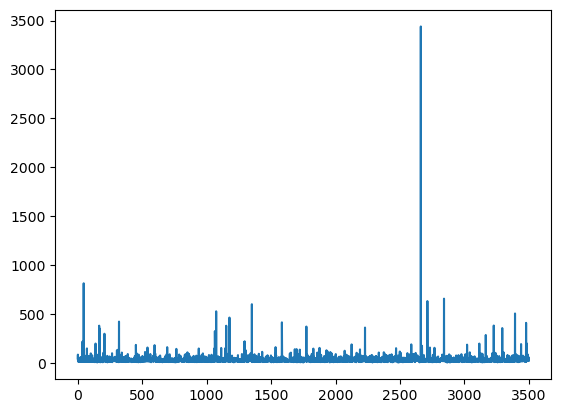

In [14]:
# Mahalanobis distance profile
df_x['mahala'].plot();

In [38]:
df_x['mahala'].mean()

34.990000000000016

In [39]:
def best_point(df):
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df.drop('target', axis=1), df['target'], train_size=0.8, random_state=42)

    rf = RandomForestRegressor(
           n_estimators=1000,
           max_depth=7,
           n_jobs=-1,
           random_state=42)
    rf.fit(X_train_1, y_train_1)
    y_hat_1 = rf.predict(X_test_1)

    mse = mean_squared_error(y_test_1, y_hat_1)

    return mse

In [40]:
least = 1.5
for i in range(45, 141):

    dataframe = df_x[df_x['mahala'] <= i]
    dataframe.pop('mahala')
    
    mse = best_point(dataframe)

    if mse < least:
        least = mse
        num = i
print(num)

51


In [41]:
df_1 = df_x[df_x['mahala'] <= 51]
df_1.pop('mahala')
df_1

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,...,4.950,1.730,1.80,4.800,3.150,10.665,10.465,16.645,5.750,10.37
2,2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,...,4.580,3.025,3.96,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,3,8.39,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,...,8.450,2.070,1.73,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,...,2.020,1.730,0.76,4.800,4.970,3.950,2.800,8.400,3.500,3.90
5,5,8.12,9.000,9.000,11.475,9.115,8.110,8.980,6.375,0.240,...,20.050,0.190,1.80,2.520,1.720,4.725,6.075,8.400,2.155,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,3494,8.65,8.367,8.760,13.900,9.265,9.930,10.400,7.150,0.720,...,8.450,1.730,1.80,4.800,4.970,3.950,6.075,8.415,3.800,3.17
3495,3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,...,14.575,0.636,1.64,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,3496,8.09,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,...,4.580,1.730,1.80,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,...,20.050,1.440,1.80,4.867,4.833,4.725,4.950,8.400,6.625,4.20


In [42]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1.drop('target', axis=1), df_1['target'], test_size=0.2, random_state=42)

rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
rf.fit(X_train_1, y_train_1)
y_hat_1 = rf.predict(X_test_1)

print(mean_squared_error(y_test_1, y_hat_1))

0.8209590063746727


In [43]:
df_1

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,...,4.950,1.730,1.80,4.800,3.150,10.665,10.465,16.645,5.750,10.37
2,2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,...,4.580,3.025,3.96,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,3,8.39,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,...,8.450,2.070,1.73,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,...,2.020,1.730,0.76,4.800,4.970,3.950,2.800,8.400,3.500,3.90
5,5,8.12,9.000,9.000,11.475,9.115,8.110,8.980,6.375,0.240,...,20.050,0.190,1.80,2.520,1.720,4.725,6.075,8.400,2.155,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,3494,8.65,8.367,8.760,13.900,9.265,9.930,10.400,7.150,0.720,...,8.450,1.730,1.80,4.800,4.970,3.950,6.075,8.415,3.800,3.17
3495,3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,...,14.575,0.636,1.64,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,3496,8.09,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,...,4.580,1.730,1.80,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,...,20.050,1.440,1.80,4.867,4.833,4.725,4.950,8.400,6.625,4.20


## Alibi Detect

In [44]:
!pip install alibi-detect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.4/372.4 kB 9.9 MB/s eta 0:00:0000:01


In [104]:
from  alibi_detect.od import Mahalanobis

od = Mahalanobis(threshold=10.)
od.infer_threshold(
    np.array(train.drop(['id', 'target'], axis=1)),
    threshold_perc=75
)
preds = od.predict(
    np.array(train.drop(['id', 'target'], axis=1)),
    return_instance_score = True
)
y_pred = preds["data"]["is_outlier"]

In [105]:
is_outlier = pd.DataFrame(y_pred, columns = ['is_outlier'])
new_df = pd.concat([train, is_outlier], axis=1, join='outer')
new_df

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7,is_outlier
0,0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,...,1.730,1.800,4.800,3.150,10.665,10.465,16.645,5.750,10.37,0
1,1,9.10,13.533,40.900,8.770,9.265,6.015,10.070,7.150,1.107,...,9.530,7.695,4.550,6.950,2.040,5.200,5.725,2.950,2.23,1
2,2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,...,3.025,3.960,4.935,4.950,4.725,6.075,6.750,3.500,3.17,0
3,3,8.39,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,...,2.070,1.730,6.300,4.700,3.500,6.200,8.670,2.900,7.37,0
4,4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,...,1.730,0.760,4.800,4.970,3.950,2.800,8.400,3.500,3.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,...,0.636,1.640,4.235,4.100,2.800,3.950,7.695,3.540,2.50,0
3496,3496,8.09,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,...,1.730,1.800,4.900,3.150,2.040,6.075,8.415,2.155,2.90,0
3497,3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,...,1.440,1.800,4.867,4.833,4.725,4.950,8.400,6.625,4.20,0
3498,3498,9.52,10.000,6.630,9.545,9.265,3.290,8.980,2.310,0.300,...,9.530,7.695,10.700,5.400,4.725,3.300,6.750,6.625,5.00,1


In [106]:
df_2 = new_df[new_df['is_outlier'] == 0]
df_2.pop('is_outlier')
df_2

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,...,4.950,1.730,1.80,4.800,3.150,10.665,10.465,16.645,5.750,10.37
2,2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,...,4.580,3.025,3.96,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,3,8.39,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,...,8.450,2.070,1.73,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,...,2.020,1.730,0.76,4.800,4.970,3.950,2.800,8.400,3.500,3.90
7,7,7.65,7.350,8.100,9.545,9.115,6.025,8.980,7.150,0.300,...,2.020,0.636,8.32,4.700,3.970,3.950,3.300,8.400,3.500,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494,3494,8.65,8.367,8.760,13.900,9.265,9.930,10.400,7.150,0.720,...,8.450,1.730,1.80,4.800,4.970,3.950,6.075,8.415,3.800,3.17
3495,3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,...,14.575,0.636,1.64,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,3496,8.09,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,...,4.580,1.730,1.80,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,...,20.050,1.440,1.80,4.867,4.833,4.725,4.950,8.400,6.625,4.20


In [107]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_2.drop('target', axis=1), df_2['target'], test_size=0.2, random_state=42)

rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
rf.fit(X_train_2, y_train_2)
y_hat_2 = rf.predict(X_test_2)

print(mean_squared_error(y_test_2, y_hat_2))

1.2279229770925284


In [1]:
df_2.to_csv('/kaggle/working/submission.csv', index=False)
df_2.head()

NameError: name 'df_2' is not defined